## Project 6 - Hospitality App New User Bookings

### Objective

1. You need to do basic feature engineering, data preprocessing, modelling and model tuning work in this homework.

2. Please **focus more on feature extractions**. In this project, there are a lot of interesting features, how to fully utilize them is the key to get a good model.


### Hints
1. Data Exploration
2. Data Processing
3. Feature Engineering
4. Model Building

In [356]:
## import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import time
import random
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [409]:
## Type your answers here ##
age_gender = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
sessions = pd.read_csv('sessions.csv')
test = pd.read_csv('test_users.csv')
train = pd.read_csv('train_users_2.csv')

In [358]:
age_gender.head()

age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0

In [359]:
countries.head()

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393303       -96.818146    2828.1333   
2                  DE        51.165707        10.452764    7879.5680   
3                  ES        39.896027        -2.487694    7730.7240   
4                  FR        46.232193         2.209667    7682.9450   

   destination_km2 destination_language   language_levenshtein_distance  
0        7741220.0                   eng                           0.00  
1        9984670.0                   eng                           0.00  
2         357022.0                   deu                          72.61  
3         505370.0                   spa                          92.25  
4         643801.0                   fra                          92.06

In [360]:
sessions.head()

user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

#### Investigate sessions

In [361]:
sessions.columns

Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')

In [362]:
test = sessions.action.value_counts().to_frame()

In [363]:
test.loc[test.action>1000, :].head()

action
show            2768278
index            843699
search_results   725226
personalize      706824
search           536057

In [210]:
test.sort_values(by='action', ascending=False).head()

action
show            2768278
index            843699
search_results   725226
personalize      706824
search           536057

In [177]:
for i in sessions.columns.drop(['user_id']):
    print(i)
    print(len(sessions[i].value_counts()))

action
359
action_type
10
action_detail
155
device_type
14
secs_elapsed
337661


In [178]:
action_df = sessions[['user_id', 'action']].pivot_table(
    index='user_id', 
    columns='action', 
    aggfunc='size', 
    fill_value=0
)

In [186]:
action_df[action_df.index == 'd1mm9tcy42'].show

user_id
d1mm9tcy42    28
Name: show, dtype: int64

In [211]:
# sessions

In [212]:
sessions.groupby('user_id').size().head()

user_id
00023iyk9l     40
0010k6l0om     63
001wyh0pz8     90
0028jgx1x1     31
002qnbzfs5    789
dtype: int64

In [11]:
test.head()

id date_account_created  timestamp_first_active  \
0  5uwns89zht           2014-07-01          20140701000006   
1  jtl0dijy2j           2014-07-01          20140701000051   
2  xx0ulgorjt           2014-07-01          20140701000148   
3  6c6puo6ix0           2014-07-01          20140701000215   
4  czqhjk3yfe           2014-07-01          20140701000305   

   date_first_booking     gender   age signup_method  signup_flow language  \
0                 NaN     FEMALE  35.0      facebook            0       en   
1                 NaN  -unknown-   NaN         basic            0       en   
2                 NaN  -unknown-   NaN         basic            0       en   
3                 NaN  -unknown-   NaN         basic            0       en   
4                 NaN  -unknown-   NaN         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0            direct             direct               untracked      Moweb   
1            direct             direct               untracked      Moweb   
2            direct             direct                  linked        Web   
3            direct             direct                  linked        Web   
4            direct             direct               untracked        Web   

  first_device_type  first_browser  
0            iPhone  Mobile Safari  
1            iPhone  Mobile Safari  
2   Windows Desktop         Chrome  
3   Windows Desktop             IE  
4       Mac Desktop         Safari

In [12]:
train.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [25]:
len(train.id.unique())

213451

In [158]:
len(sessions.user_id.unique())

135484

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


#### Looking at categorical variables

In [410]:
categorical_col = train.select_dtypes(['object']).columns.drop(['id', 'date_account_created', 'date_first_booking'])

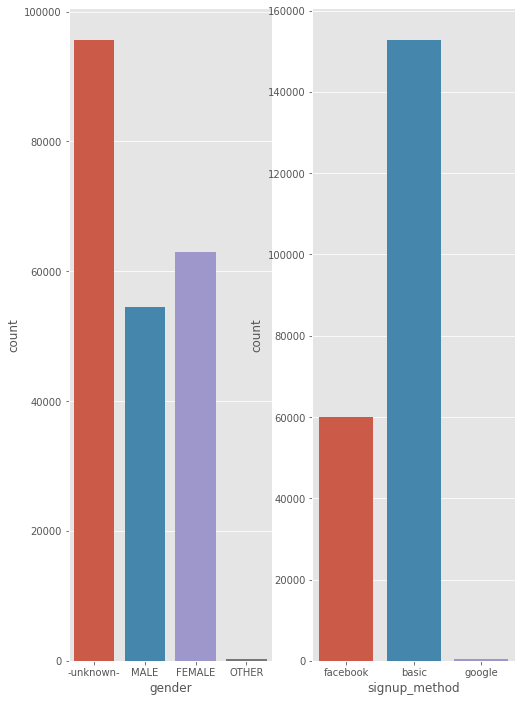

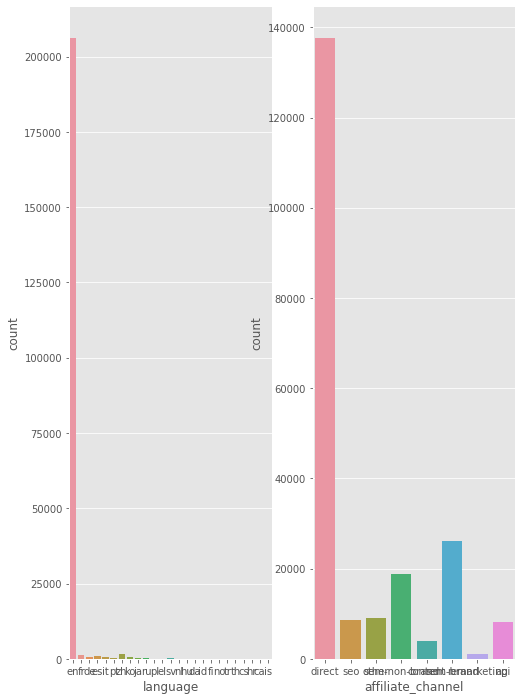

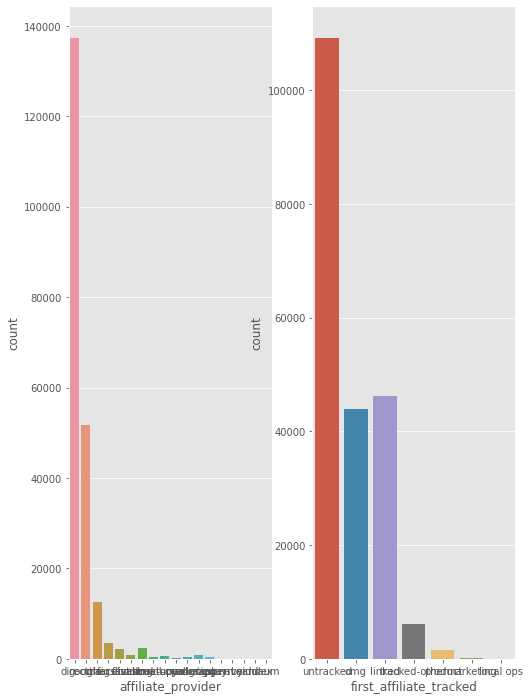

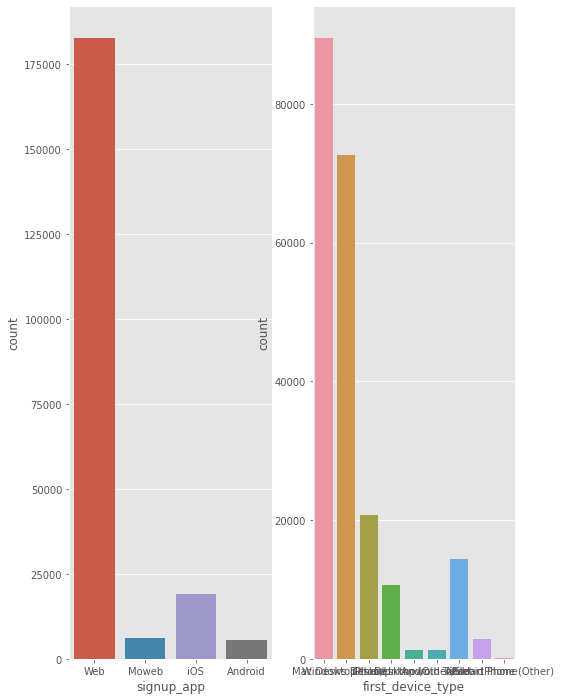

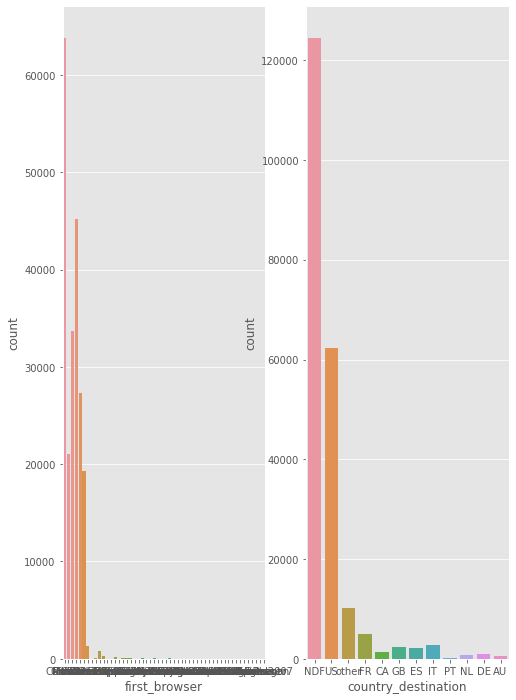

In [325]:
n_cols = 2
n_rows = 5
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(8, 12))
    for j in range(n_cols):
        sns.countplot(x=categorical_col[i*n_cols+j], data=train, ax=ax[j])

In [326]:
for i in categorical_col:
    print(i)
    print(train[i].value_counts())

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64
signup_method
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
language
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64
affiliate_channel
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
affiliate_provider
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
faceb

In [329]:
drop_cat

['language']

In [411]:
drop_cat = []
for i in categorical_col:
    test = train[i].value_counts()/len(train)
    if (test > 0.9).any(): 
        drop_cat.append(i)

In [412]:
train[categorical_col].isna().sum()

gender                        0
signup_method                 0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6065
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64

In [413]:
train = train.drop(columns=drop_cat, axis = 1)
categorical_col = categorical_col.drop('language')

##### Only language has one category that is more than 90%

#### Looking at numerical variables 

<AxesSubplot:ylabel='signup_flow'>

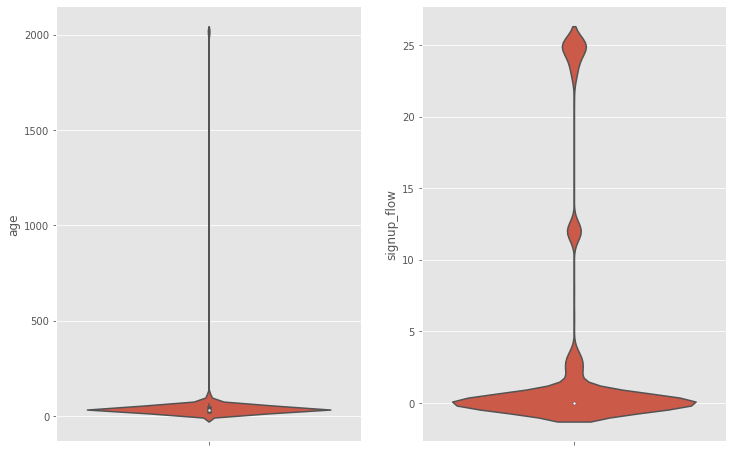

In [414]:
numeric_col = train.select_dtypes(['int64', 'float64']).columns.drop('timestamp_first_active')
n_cols = 2
n_rows = 1
fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
sns.violinplot(y=numeric_col[0], data=train, ax=ax[0])
sns.violinplot(y=numeric_col[1], data=train, ax=ax[1])

In [331]:
train[numeric_col].isna().sum()

age            87990
signup_flow        0
dtype: int64

##### We need to fix age columns

#### Extract some information 

In [415]:
train.date_account_created = pd.to_datetime(train.date_account_created, format="%Y-%m-%d")
train.timestamp_first_active = pd.to_datetime(train.timestamp_first_active, format="%Y%m%d%H%M%S")
train.date_first_booking = pd.to_datetime(train.date_first_booking, format="%Y-%m-%d")

In [416]:
train['created_year'] = train.date_account_created.dt.year
train['created_month'] = train.date_account_created.dt.month
train['created_day'] = train.date_account_created.dt.day

In [417]:
train['firstactive_year'] = train.timestamp_first_active.dt.year
train['firstactive_month'] = train.timestamp_first_active.dt.month
train['firstactive_day'] = train.timestamp_first_active.dt.day
train['firstactive_hr'] = train.timestamp_first_active.dt.hour

In [418]:
train['1stbooking_year'] = train.date_first_booking.dt.year
train['1stbooking_month'] = train.date_first_booking.dt.month
train['1stbooking_day'] = train.date_first_booking.dt.day

In [419]:
train_drop = train.drop(columns = ['date_account_created', 'timestamp_first_active', 'date_first_booking'], axis = 1)

#### Check correlation 

In [420]:
numeric_col_new = [
    'created_year', 'created_month', 'created_day', 'firstactive_year', 'firstactive_month', 'firstactive_day', 
    'firstactive_hr', '1stbooking_year', '1stbooking_month', '1stbooking_day', 'age', 'signup_flow'
]
corr_df = train[numeric_col_new].corr().unstack().abs().reset_index()

In [421]:
corr_df.loc[(corr_df[0]>0.9) & (corr_df[0]!=1), :].sort_values(0)

level_0            level_1         0
43   firstactive_year    1stbooking_year  0.949963
87    1stbooking_year   firstactive_year  0.949963
7        created_year    1stbooking_year  0.950626
84    1stbooking_year       created_year  0.950626
16      created_month  firstactive_month  0.999264
49  firstactive_month      created_month  0.999264
29        created_day    firstactive_day  0.999268
62    firstactive_day        created_day  0.999268
3        created_year   firstactive_year  0.999325
36   firstactive_year       created_year  0.999325

In [422]:
corr_drop = ['created_year', 'created_month', 'created_day', 'firstactive_year']

In [423]:
numeric_col_new_drop = [i for i in numeric_col_new if i not in corr_drop]

In [424]:
train_drop = train_drop.drop(columns = corr_drop, axis = 1)

#### Fix missing value numeric variables

In [342]:
train[numeric_col_new_drop].isna().sum()

firstactive_month         0
firstactive_day           0
firstactive_hr            0
1stbooking_year      124543
1stbooking_month     124543
1stbooking_day       124543
age                   87990
signup_flow               0
dtype: int64

In [425]:
train_drop.loc[train_drop['age'].isna(), 'ageX'] = 1
train_drop.loc[~train_drop['age'].isna(), 'ageX'] = 0

In [426]:
train_drop.loc[train_drop['1stbooking_year'].isna(), '1stbookingX'] = 1
train_drop.loc[~train_drop['1stbooking_year'].isna(), '1stbookingX'] = 0

In [427]:
train_drop.loc[train_drop['1stbooking_year'].isna(), '1stbooking_year'] = train_drop['1stbooking_year'].median()
train_drop.loc[train_drop['1stbooking_month'].isna(), '1stbooking_month'] = train_drop['1stbooking_month'].median()
train_drop.loc[train_drop['1stbooking_day'].isna(), '1stbooking_day'] = train_drop['1stbooking_day'].median()

In [428]:
train_drop.loc[train_drop['age'].isna(), 'age'] = train_drop['age'].median()

In [429]:
train_drop

id     gender   age signup_method  signup_flow  \
0       gxn3p5htnn  -unknown-  34.0      facebook            0   
1       820tgsjxq7       MALE  38.0      facebook            0   
2       4ft3gnwmtx     FEMALE  56.0         basic            3   
3       bjjt8pjhuk     FEMALE  42.0      facebook            0   
4       87mebub9p4  -unknown-  41.0         basic            0   
5       osr2jwljor  -unknown-  34.0         basic            0   
6       lsw9q7uk0j     FEMALE  46.0         basic            0   
7       0d01nltbrs     FEMALE  47.0         basic            0   
8       a1vcnhxeij     FEMALE  50.0         basic            0   
9       6uh8zyj2gn  -unknown-  46.0         basic            0   
10      yuuqmid2rp     FEMALE  36.0         basic            0   
11      om1ss59ys8     FEMALE  47.0         basic            0   
12      k6np330cm1  -unknown-  34.0         basic            0   
13      dy3rgx56cu     FEMALE  37.0         basic            0   
14      ju3h98ch3w     FEMALE  36.0         basic            0   
15      v4d5rl22px     FEMALE  33.0         basic            0   
16      2dwbwkx056  -unknown-  34.0         basic            0   
17      frhre329au  -unknown-  31.0         basic            0   
18      cxlg85pg1r  -unknown-  34.0         basic            0   
19      gdka1q5ktd     FEMALE  29.0         basic            0   
20      qdubonn3uk  -unknown-  34.0         basic            0   
21      qsibmuz9sx       MALE  30.0         basic            0   
22      80f7dwscrn  -unknown-  40.0         basic            0   
23      jha93x042q  -unknown-  34.0         basic            0   
24      7i49vnuav6     FEMALE  40.0         basic            0   
25      al8bcetz0g     FEMALE  26.0         basic            0   
26      bjg0m5otl3  -unknown-  34.0         basic            0   
27      hfrl5gle36     FEMALE  32.0         basic            0   
28      tp6x3md0n4  -unknown-  35.0         basic            0   
29      hql77nu2lk  -unknown-  37.0         basic            0   
...            ...        ...   ...           ...          ...   
213421  c98s3h7kgj  -unknown-  34.0         basic            0   
213422  ytmpiwb8hj  -unknown-  34.0         basic            0   
213423  3dx1jk6yk2     FEMALE  20.0      facebook           25   
213424  hcfj07iowv     FEMALE  32.0      facebook            0   
213425  l1f71f9vsj     FEMALE  30.0      facebook            0   
213426  15bj4ahmhf  -unknown-  34.0         basic            0   
213427  qwpybxfjdl  -unknown-  34.0         basic            0   
213428  k4t61wuvyq  -unknown-  34.0         basic           23   
213429  mhh7b52z44  -unknown-  34.0         basic           25   
213430  79wk7k2k5t  -unknown-  19.0         basic            0   
213431  ftwmocvwlq  -unknown-  34.0         basic            0   
213432  rg7ayg1tob       MALE  31.0      facebook            0   
213433  2f24umzkuv  -unknown-  34.0         basic            0   
213434  or77n2ojuj  -unknown-  34.0         basic            0   
213435  0a5bnb9bs4  -unknown-  34.0         basic            0   
213436  6fzrn49sfn  -unknown-  34.0         basic           25   
213437  r0jq0devgy  -unknown-  34.0         basic           23   
213438  v5lq9bj8gv  -unknown-  34.0         basic           25   
213439  msucfwmlzc       MALE  43.0         basic            0   
213440  04y8115avm     FEMALE  24.0         basic           25   
213441  omlc9iku7t     FEMALE  34.0         basic            0   
213442  rf0ay567js  -unknown-  34.0         basic            0   
213443  0k26r3mir0     FEMALE  36.0         basic            0   
213444  40o1ivh6cb  -unknown-  34.0         basic            0   
213445  qbxza0xojf     FEMALE  23.0         basic            0   
213446  zxodksqpep       MALE  32.0         basic            0   
213447  mhewnxesx9  -unknown-  34.0         basic            0   
213448  6o3arsjbb4  -unknown-  32.0         basic            0   
213449  jh95kwisub  -unknown-  34.0         basic       

#### Fix missing value categorical variables

In [379]:
train_drop[categorical_col].isna().sum()

gender                        0
signup_method                 0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    6065
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64

In [380]:
train_drop.loc[train_drop.first_affiliate_tracked.isna(), categorical_col].head()

gender signup_method affiliate_channel affiliate_provider  \
12  -unknown-         basic            direct             direct   
16  -unknown-         basic             other         craigslist   
17  -unknown-         basic             other         craigslist   
18  -unknown-         basic               seo           facebook   
20  -unknown-         basic            direct             direct   

   first_affiliate_tracked signup_app first_device_type first_browser  \
12                     NaN        Web     Other/Unknown     -unknown-   
16                     NaN        Web     Other/Unknown     -unknown-   
17                     NaN        Web     Other/Unknown     -unknown-   
18                     NaN        Web     Other/Unknown     -unknown-   
20                     NaN        Web     Other/Unknown     -unknown-   

   country_destination  
12                  FR  
16                 NDF  
17                  US  
18                 NDF  
20                  US

In [381]:
train_drop.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [430]:
train_drop.loc[train_drop.first_affiliate_tracked.isna(), 'first_affiliate_tracked'] = "untracked"

#### Apply dummy

In [431]:
dummy_col = categorical_col.drop('country_destination')

In [432]:
dummy_col

Index(['gender', 'signup_method', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [433]:
cat_dummy = pd.get_dummies(data=train_drop[dummy_col], drop_first=True)

In [435]:
train_drop = train_drop.drop(columns=dummy_col, axis=1)

In [434]:
cat_dummy.head()

gender_FEMALE  gender_MALE  gender_OTHER  signup_method_facebook  \
0              0            0             0                       1   
1              0            1             0                       1   
2              1            0             0                       0   
3              1            0             0                       1   
4              0            0             0                       0   

   signup_method_google  affiliate_channel_content  affiliate_channel_direct  \
0                     0                          0                         1   
1                     0                          0                         0   
2                     0                          0                         1   
3                     0                          0                         1   
4                     0                          0                         1   

   affiliate_channel_other  affiliate_channel_remarketing  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   affiliate_channel_sem-brand  ...  first_browser_SeaMonkey  \
0                            0  ...                        0   
1                            0  ...                        0   
2                            0  ...                        0   
3                            0  ...                        0   
4                            0  ...                        0   

   first_browser_Silk  first_browser_SiteKiosk  first_browser_SlimBrowser  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   

   first_browser_Sogou Explorer  first_browser_Stainless  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   first_browser_TenFourFox  first_browser_TheWorld Browser  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   first_browser_Yandex.Browser  first_browser_wOSBrowser  
0                             0                         0  
1                             0                         0  
2                             0                         0  
3                             0                         0  
4                             0                         0  

[5 rows x 97 columns]

In [436]:
output = pd.concat([train_drop, cat_dummy], axis=1)

#### Feature label

In [437]:
output.loc[train['country_destination'] != 'NDF', 'country_destination'] = "Purchase"

In [445]:
output.isna().sum().head()

id                     0
age                    0
signup_flow            0
country_destination    0
firstactive_month      0
dtype: int64

In [453]:
# output

#### Baseline training

In [439]:
from sklearn.model_selection import train_test_split
X = output.drop(['id', 'country_destination'], axis = 1)
y = output['country_destination'].astype('object')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [465]:
pd.options.display.max_columns = None
X

age  signup_flow  firstactive_month  firstactive_day  \
0         34.0            0                  3               19   
1         38.0            0                  5               23   
2         56.0            3                  6                9   
3         42.0            0                 10               31   
4         41.0            0                 12                8   
5         34.0            0                  1                1   
6         46.0            0                  1                2   
7         47.0            0                  1                3   
8         50.0            0                  1                4   
9         46.0            0                  1                4   
10        36.0            0                  1                4   
11        47.0            0                  1                5   
12        34.0            0                  1                5   
13        37.0            0                  1                5   
14        36.0            0                  1                7   
15        33.0            0                  1                7   
16        34.0            0                  1                7   
17        31.0            0                  1                7   
18        34.0            0                  1                8   
19        29.0            0                  1               10   
20        34.0            0                  1               10   
21        30.0            0                  1               10   
22        40.0            0                  1               11   
23        34.0            0                  1               11   
24        40.0            0                  1               11   
25        26.0            0                  1               12   
26        34.0            0                  1               12   
27        32.0            0                  1               12   
28        35.0            0                  1               13   
29        37.0            0                  1               13   
30        42.0            0                  1               14   
31        31.0            0                  1               14   
32        31.0            0                  1               14   
33        29.0            0                  1               14   
34        59.0            0                  1               15   
35        49.0            0                  1               15   
36        31.0            0                  1               15   
37        30.0            0                  1               15   
38        34.0            0                  1               15   
39        35.0            0                  1               16   
40        26.0            0                  1               16   
41        30.0            0                  1               19   
42        29.0            0                  1               21   
43        34.0            0                  1               21   
44        34.0            0                  1               23   
45        44.0            0                  1               23   
46        34.0            0                  1               24   
47        34.0            0                  1               24   
48        34.0            0                  1               24   
49        34.0            0                  1               24   
50        30.0            0                  1               25   
51        34.0            0                  1               25   
52        33.0            0                  1               25   
53        28.0            0                  1               26   
54        44.0            0                  1               26   
55        19.0            0                  1               26   
56        53.0            0                  1               27   
57        34.0            0                  1               27   
58        52.0            0                  1            

In [469]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(
    random_state=42
)
forest_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [470]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
y_pred = forest_clf.predict(X_test)
print(recall_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))
print(accuracy_score(y_test, y_pred))

[1. 1.]
[1. 1.]
[1. 1.]
1.0


In [471]:
confusion_matrix(y_test, y_pred)

array([[40905,     0],
       [    0, 29534]])